In [6]:
from B_VAE.VAE_v2 import b_encodeco
from Train_utils import train_utils
from B_VAE.Utils_imp_VAE import loss_fn
from Train_utils.train_utils import train,test,K_fold_train

import torch

device='cpu'

import sys
import os
sys.path.append(os.path.join("..","Data_prep"))
from torchvision import transforms
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import multi_image_resize
from Transforms import multi_ToTensor
from Transforms import output_transform
from Transforms import rgb_normalize

import matplotlib.pyplot as plt
import torch

DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=aorus_1,volume=Paltas_DataBase/Data_Base_v2"
#DB="//MYCLOUDPR4100/Paltas_DataBase/Data_Base_v2"
d_tt=transforms.Compose([
    phantom_segmentation(False),
    rgb_normalize(ImType=['PhantomRGB']),
    multi_image_resize(ImType=['PhantomRGB'],size=(100,100)),
    multi_ToTensor(ImType=['PhantomRGB']),
    output_transform()
    ])
#datar=Dataset_direct(root_dir=DB,ImType=['PhantomRGB','SenteraRGB'],Intersec=False)
#datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False,transform=d_tt)


In [7]:
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False,transform=d_tt)

train_s=int((len(datab))*0.7)
test_s=int(len(datab)-train_s)
train_set, test_set = torch.utils.data.random_split(datab, [train_s, test_s])

dataloader_train=torch.utils.data.DataLoader(train_set,batch_size=2,shuffle=True)
dataloader_test=torch.utils.data.DataLoader(test_set,batch_size=2,shuffle=True)

In [4]:
model=b_encodeco(image_dim=int(256),
                 image_channels=3,
                 repr_sizes=[3,5],
                 layer_sizes=[100,50],
                 latent_space_size=20,
                 conv_kernel_size=11,
                 conv_pooling=[True,True],
                 conv_batch_norm=[True,False],
                 NN_batch_norm=[True,False],
                 stride=2,
                 device="cpu")
model.to(device)



[5 7]
(246, 246)
(236, 236)
(226, 226)
(216, 216)
[5 7]
(216, 216)
[5 7]
(246, 246)
(236, 236)
(226, 226)
(216, 216)
[5 7]
(216, 216)
0
0
padding
0
padding
0


b_encodeco(
  (encoder_conv): b_encoder_conv(
    (im_layers): ModuleList(
      (0): set_conv(
        (comp_layer): ModuleList(
          (0): Conv2d(3, 3, kernel_size=(11, 11), stride=(1, 1))
          (1): ReLU()
          (2): MaxPool2d(kernel_size=11, stride=1, padding=0, dilation=1, ceil_mode=False)
          (3): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): set_conv(
        (comp_layer): ModuleList(
          (0): Conv2d(3, 5, kernel_size=(11, 11), stride=(1, 1))
          (1): ReLU()
          (2): MaxPool2d(kernel_size=11, stride=1, padding=0, dilation=1, ceil_mode=False)
        )
      )
    )
  )
  (encoder_NN_mu): NeuralNet(
    (layers): ModuleList(
      (0): Sequential(
        (0): NN_layer(
          (layer): ModuleList(
            (0): Linear(in_features=233280, out_features=100, bias=True)
            (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2)

In [8]:
 inputs = next(iter(dataloader_train))

array([ 0,  0,  0, ..., 86, 86, 89])

In [5]:
a=model(inputs["PhantomRGB"])

torch.Size([2, 3, 2048, 2048])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 5, 2028, 2028])
torch.Size([2, 5, 2028, 2028])
torch.Size([2, 5, 2028, 2028])
torch.Size([2, 5, 2028, 2028])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 3, 2038, 2038])
torch.Size([2, 3, 2048, 2048])
torch.Size([2, 3, 2048, 2048])


In [10]:
a[0].shape

torch.Size([2, 3, 2048, 2048])

In [4]:
from skimage.transform import resize
img=datab[10]["PhantomRGB"]

In [47]:
imgr=resize(img/255,(1024,1024))

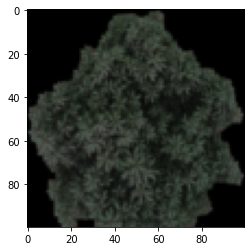

In [5]:
#ttt=multi_image_resize(ImType=['PhantomRGB'],size=(2048,2048))
#pr=ttt(datab[10])
plt.imshow(datab[10]["PhantomRGB"])

In [42]:
img.shape

(3168, 3757, 3)

In [5]:
import pathlib
from Train_utils.train_utils import train,test,train_test,K_fold_train

In [ ]:
opt=torch.optim.Adam(model.parameters(),lr=1e-3)
train(model=model,
      optimizer=opt,
     dataloader=dataloader_test,
     use_cuda=False,
     loss_function=loss_fn)

instances: 0it [00:00, ?it/s]

iniciio
model result
model loss
zero grad


/home/lambda/paltas/lib/python3.6/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss back


instances: 1it [01:08, 68.93s/it]

step
total loss 10876896.0000	 BCE 10876896.0000	 KLD 0.0002


In [ ]:
opt=torch.optim.Adam(model.parameters(),lr=1e-3)
test(model=model,
     dataloader=dataloader_test,
     use_cuda=False,
     loss_function=loss_fn)

In [ ]:
opt=torch.optim.Adam(model.parameters(),lr=1e-3)

train_test(model=model,
           optimizer=opt,
           dataloader_train=dataloader_train,
           dataloader_test=dataloader_test,
           use_cuda=False,
           loss_function=loss_fn,
           epochs=2,
           data_train_dir=str(pathlib.Path().absolute()))

In [ ]:
str(pathlib.Path().absolute())

K_fold_train(model=model,
                dataset=datab,
                epochs=100,
                batch_size=200,
                use_cuda=False,
                folds=5,
                data_train_dir=str(pathlib.Path().absolute()),
                loss_fn=loss_fn
     )